In [1]:
%matplotlib ipympl

from utils.paths import ProjDirs
from objects.song import Song
from objects.syllable import Syllable
from utils import plots
from utils.tools import get_positions

# import warnings
# warnings.simplefilter('once')
# warnings.filterwarnings("ignore", category=DeprecationWarning) 
# wavesongs, zoosongs

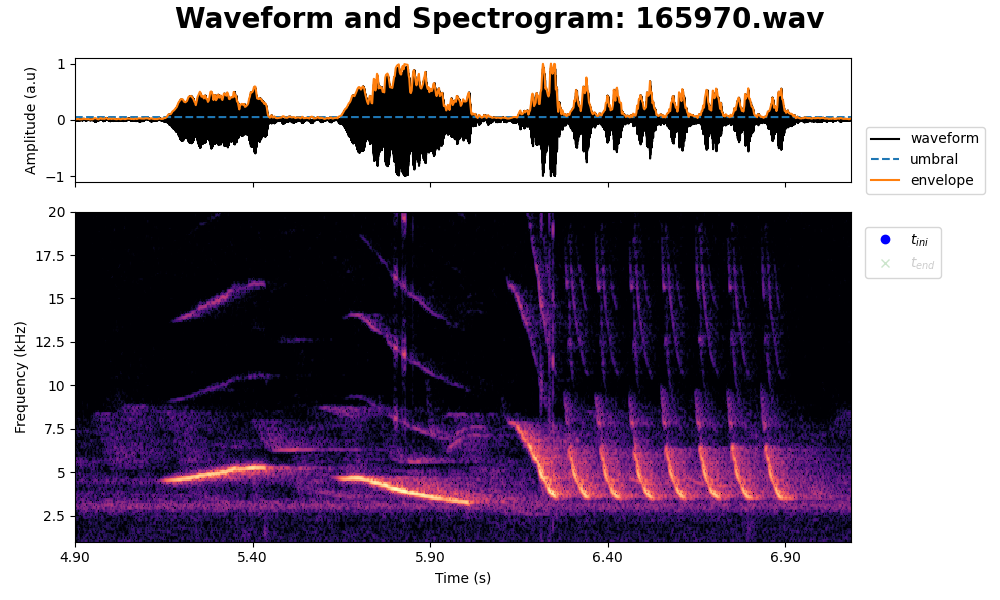

In [2]:
proj_dirs = ProjDirs(root="../", audios="audios")
song_copeton = Song(proj_dirs, "165970", tlim=(4.9,7.1))
song_copeton.acoustical_features(umbral_FF=1.4, NN=512)

klicker_times = plots.spectrogram_waveform(song_copeton, #tlim=(4.9,7.1), #figsize=(9,5),
                                           select_time=True, show=True, save=False)

In [3]:
# klicker_times = plots.spectrogram_waveform(song_copeton, tlim=(4.9,7.0), #figsize=(9,5),
#                                            select_time=True, show=False, save=False)

In [4]:
# data = get_positions(klicker_times)
# tlim, flim = data[0] # first pair, index = 0 
# t0 = tlim[0] + song_copeton.t0_bs
# tend = tlim[1] + song_copeton.t0_bs
# print(f"Initial time: {t0:.4f} s. Final time {tend:.4f} s")

/home/saguileran/anaconda3/envs/wavesongs/lib/python3.12/site-packages/librosa/core/spectrum.py:387: ComplexWarning: Casting complex values to real discards the imaginary part
  stft_matrix[..., bl_s + off_start : bl_t + off_start] = fft.rfft(


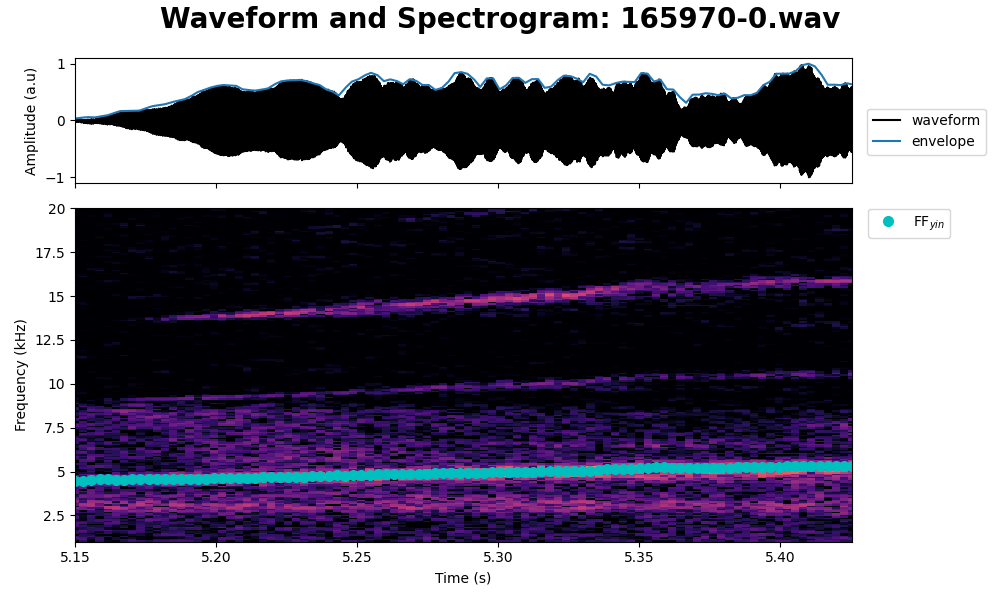

In [5]:
tlim = (5.1473-song_copeton.t0_bs, 5.4348-song_copeton.t0_bs)
copeton_1 = Syllable(obj=song_copeton, tlim=tlim)
# copeton_1.acoustical_features(NN=64)
plots.spectrogram_waveform(copeton_1, ff_on=True, select_time=False, show=True, save=False)

In [6]:
# from objects.syllable import read_MG
# cop = read_MG("165970", 0)
# plots.spectrogram_waveform(cop)

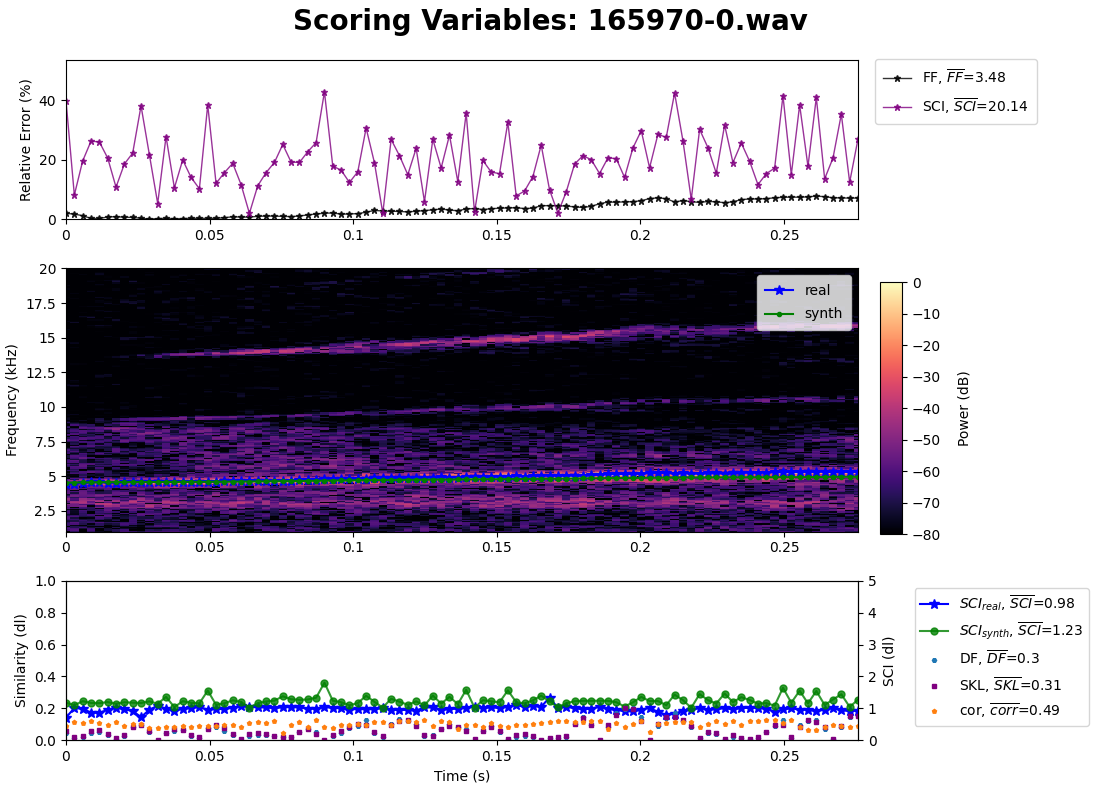

No such comm: 73becad2f09f448683b6644970998e2e


In [7]:
# _params = {
#     "gm": 4e4,      # time scaling constant
#     # -- Trachea --
#     "C":343,        # speed of sound in media [m/s]
#     "L":0.025,      # trachea length [m]
#     "r":0.65,       # reflection coeficient [adimensionelss]
#     # -- Beak, Glottis and OEC --
#     "Ch":1.43E-10,  # OEC Compliance [m^3/Pa]
#     "MG":20,        # Beak Inertance [Pa s^2/m^3 = kg/m^4]
#     "MB":1E4,       # Glottis Inertance [Pa s^2/m^3 = kg/m^4]
#     "RB":5E6,       # Beak Resistance [Pa s/m^3 = kg/m^4 s]
#     "Rh":24E3       # OEC Resistence [Pa s/m^3 = kg/m^4 s]
# }

# z = {
#     "a0": 0.11,
#     # "a1": 
#     # "a2": 
#     "b0": -8, # khz
#     "b1": 3, 
#     "b2": 7,
# }

synth_copeton_1 = copeton_1.solve()
plots.scores(copeton_1, synth_copeton_1, show=True)
# plots.spectrogram_waveform(synth_copeton_1, ff_on=True, select_time=False, show=True, save=False)
# plots.syllables(copeton_1, synth_copeton_1, ff_on=True)

In [11]:
synth_copeton_1.file_name

'synth_165970.wav'

Motor gesture parameters saved at ../results/MG_param/165970-0-MG.csv.


/home/saguileran/anaconda3/envs/wavesongs/lib/python3.12/site-packages/librosa/core/spectrum.py:387: ComplexWarning: Casting complex values to real discards the imaginary part
  stft_matrix[..., bl_s + off_start : bl_t + off_start] = fft.rfft(


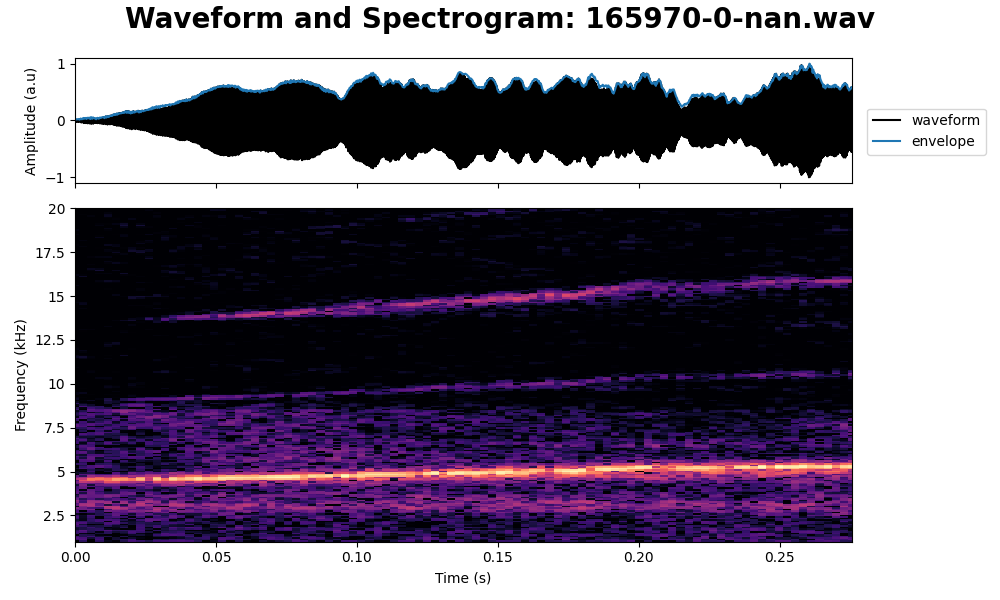

No such comm: 0b6c9da48abe4bd4bf694dc30f02c3f0


In [9]:
synth_copeton_1.export_mg()

from objects.syllable import read_MG
cop = read_MG("165970", 0)
plots.spectrogram_waveform(cop)

In [ ]:
# plots.alpha_beta(synth_copeton_1)
synth_copeton_1.z

In [8]:
# plots.scores(copeton_1, synth_copeton_1, show=False)

In [9]:
# from model import optimizer as optz
# args = tuple(copeton_1.params.values()) + (copeton_1,)
# optz.residual_sci_a0([2], *args)
# # optz.residual_ff_b1([2], *args)

In [ ]:
#params = args[-1].params#._set_params([2,2,4])
# copeton_1.z["a0"] = 0.1 
# copeton_1.z["b1"] = float(copeton_1.z["b1"])
copeton_1.z

In [ ]:
from model import optimizer as optz

opt_z = optz.optimal_params(syllable=copeton_1, params=copeton_1.params, Ns=50,
                            full_output=True, disp=True)
opt_z

Optimization terminated successfully.
         Current function value: 0.000474
         Iterations: 84
         Function evaluations: 158
         b_0*=-0.3586, b_2*=1.2177, t=14.78 min
Optimization terminated successfully.
         Current function value: 0.000474
         Iterations: 10
         Function evaluations: 21
         b_1*=1.0000, t=1.43 min

In [ ]:
# opt_z_gen = optz.optimal_params_general(copeton_1, _params, Ns=10, full_output=True, disp=True)
# opt_z_gen

In [ ]:
synth_copeton_1_opt = copeton_1.solve(z=opt_z, params=copeton_1.params)
plots.scores(copeton_1, synth_copeton_1_opt)

In [ ]:
proj_dirs.__str__

In [ ]:
proj_dirs = ProjDirs(root="../", audios="audios")

copeton_1 = Syllable(file_id="165970", proj_dirs=proj_dirs, tlim=(0.5,2.0))
copeton_1.acoustical_features(umbral_FF=1.2)
plots.spectrogram_waveform(copeton_1, ff_on=False, select_time=False, show=True, save=False)

In [ ]:
2*synth_copeton_1.deltaFF.max()
2*max(synth_copeton_1.deltaFF.max(), synth_copeton_1.deltaSCI.max())

In [ ]:
copeton_1.ff_method

In [ ]:
from scipy.optimize import root, fsolve

def y(x, *params):
  return params[0] + params[1]*x + params[2]**x**2

sol = root(y, [-10,10], args=(1,3,2), method='hybr', jac=None, tol=0.0001, callback=None, options=None)
sol.x

# sol = root_scalar(y, args=(1,3,2), method=None, bracket=None, fprime=None, fprime2=None, x0=20, x1=None, xtol=None, rtol=None, maxiter=None, options=None)
# fsolve(y, [-10,1], args=(1,3,2), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
